# Polynomial Regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the data set.

df = pd.read_csv('data/FuelConsumption.csv')

df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [3]:
# selecting some features for the regression.

features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']

new_df = df[features]

new_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


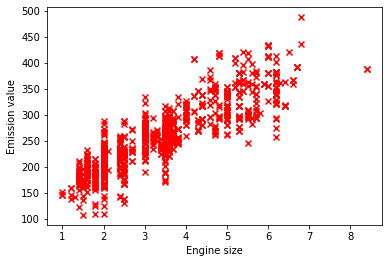

In [4]:
# plotting Emission w.r.t Engine size.

plt.scatter(new_df['ENGINESIZE'], new_df['CO2EMISSIONS'], color='red', marker='x')
plt.xlabel('Engine size')
plt.ylabel('Emission value')
plt.show()

In [5]:
# creating the train and test splits.

mask = np.random.rand(len(new_df)) < 0.8

train = new_df[mask]

test = new_df[~mask]

In [6]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures() generates a matrix with all polynomial combinations with degree <= specified degree.

train_x = np.asanyarray(train[['ENGINESIZE']])

train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])

test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)

# generating the polynomial features.

train_x_poly = poly.fit_transform(train_x)

print(train_x.shape)

print(train_x_poly.shape)

(866, 1)
(866, 3)


In [7]:
# now we can simply use linear regression on the generted polynomial features.

regr = linear_model.LinearRegression()

regr.fit(train_x_poly, train_y)

print("Intercept : ", regr.intercept_)

print("coefficients : ", regr.coef_)

Intercept :  [112.44979765]
coefficients :  [[ 0.         47.58867678 -1.14180729]]


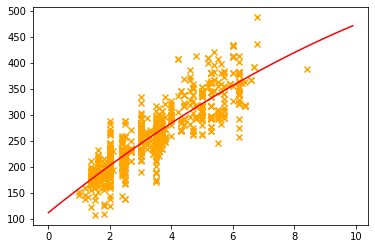

In [8]:
# plotting.

plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='orange', marker='x')

# plotting the curve.

XX = np.arange(0, 10, 0.1)

yy = regr.intercept_[0] + regr.coef_[0][0] * 1 + regr.coef_[0][1] * XX + regr.coef_[0][2] * (XX ** 2)

plt.plot(XX, yy, color='red')

plt.show()

In [9]:
#  model evaluation.

from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)

predict_y = regr.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predict_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predict_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, predict_y))

Mean absolute error: 24.05
Residual sum of squares (MSE): 968.60
R2-score: 0.75
